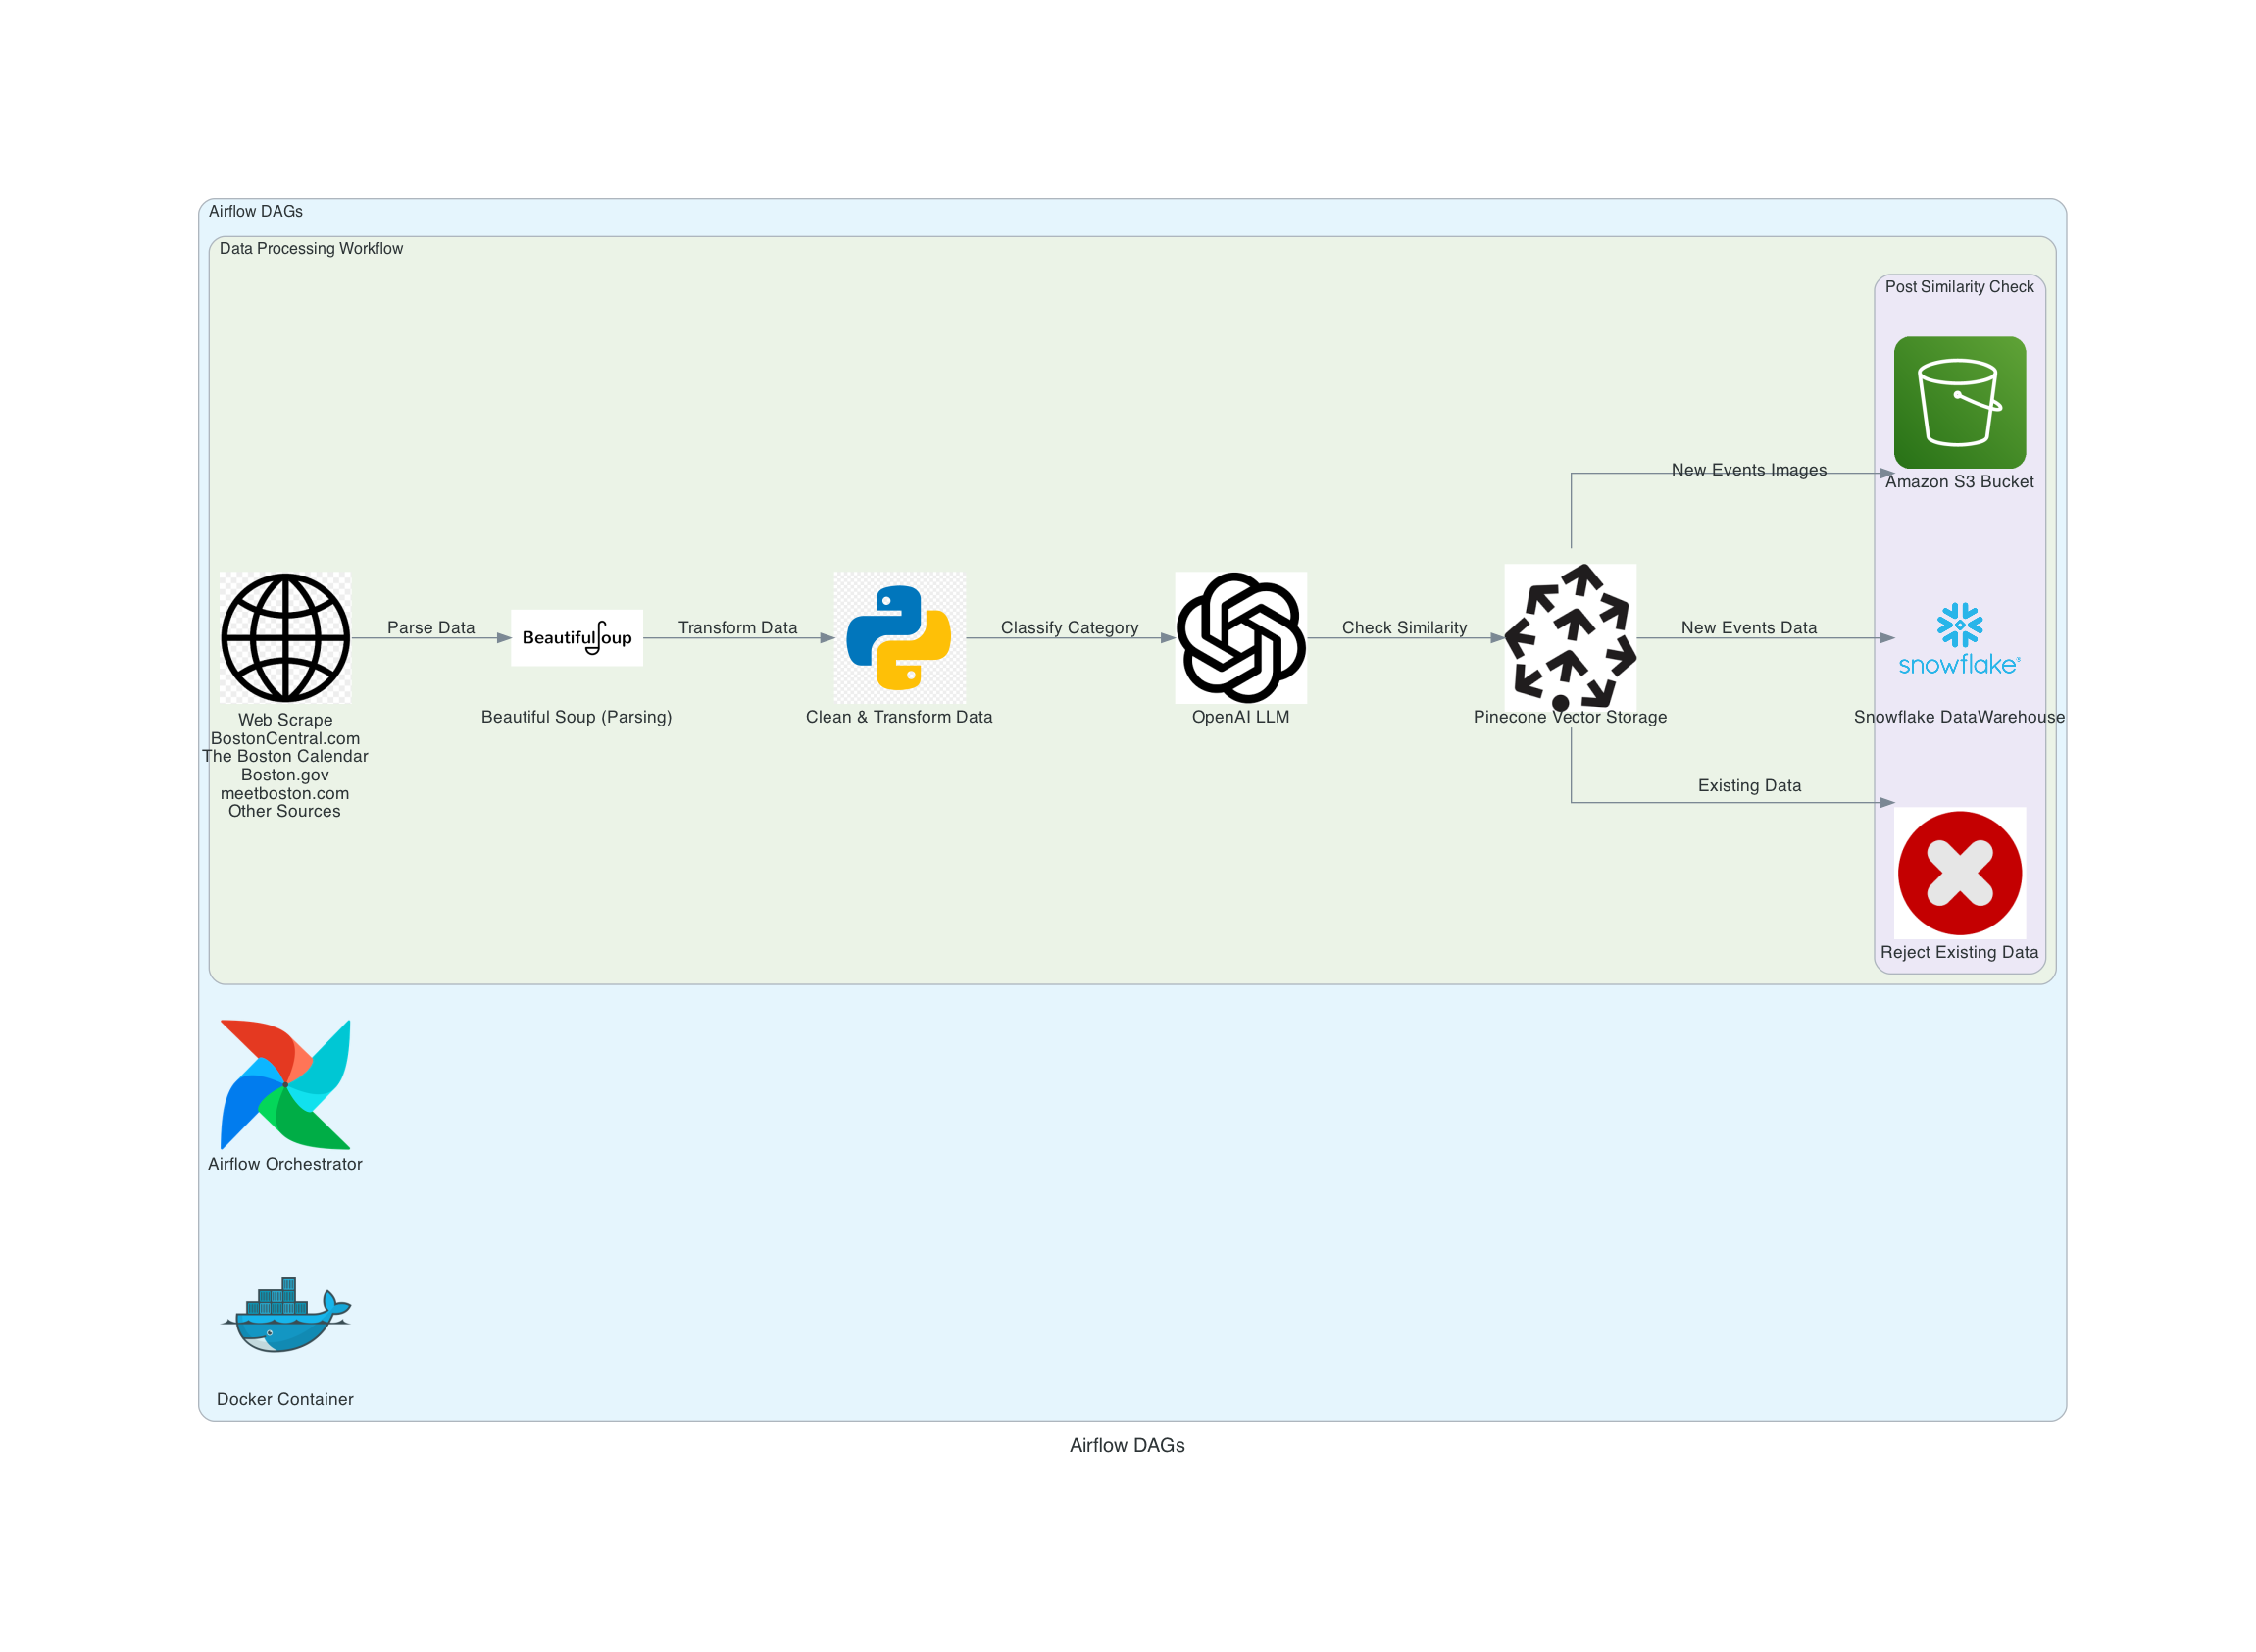

In [1]:
from diagrams import Diagram, Cluster, Edge
from diagrams.onprem.workflow import Airflow
from diagrams.onprem.container import Docker
from diagrams.custom import Custom
from diagrams.aws.storage import S3

web_scrape_icon = "input_icons/web.png"
beautiful_soup_icon = "input_icons/bs.png"
python_icon = "input_icons/python.png" 
openai_icon = "input_icons/OpenAI.png"
pinecone_icon = "input_icons/pinecone.png"
snowflake_icon = "input_icons/snowflake.png"
reject_icon = "input_icons/reject.png" 

with Diagram("Airflow DAGs", show=False, direction="LR") as diag:
    
    with Cluster("Airflow DAGs"):
        airflow = Airflow("Airflow Orchestrator")
        docker = Docker("Docker Container")

        
        with Cluster("Data Processing Workflow"):
            
            web_scrape = Custom(
                "Web Scrape\nBostonCentral.com\nThe Boston Calendar\nBoston.gov\nmeetboston.com\nOther Sources",
                web_scrape_icon,
            )

            
            parser = Custom("Beautiful Soup (Parsing)", beautiful_soup_icon)
            transformation = Custom("Clean & Transform Data", python_icon)
            classifier = Custom("OpenAI LLM", openai_icon)
            similarity_check = Custom("Pinecone Vector Storage", pinecone_icon)

            with Cluster("Post Similarity Check"):
                reject = Custom("Reject Existing Data", reject_icon)
                snowflake = Custom("Snowflake DataWarehouse", snowflake_icon)
                s3_storage = S3("Amazon S3 Bucket")

        web_scrape >> Edge(label="Parse Data") >> parser
        parser >> Edge(label="Transform Data") >> transformation
        transformation >> Edge(label="Classify Category") >> classifier
        classifier >> Edge(label="Check Similarity") >> similarity_check
        similarity_check >> Edge(label="Existing Data") >> reject
        similarity_check >> Edge(label="New Events Data") >> snowflake
        similarity_check >> Edge(label="New Events Images") >> s3_storage

diag

In [100]:
from diagrams import Diagram, Cluster, Edge
from diagrams.onprem.workflow import Airflow
from diagrams.onprem.container import Docker
from diagrams.custom import Custom
from diagrams.aws.storage import S3

web_scrape_icon = "input_icons/web.png"
beautiful_soup_icon = "input_icons/bs.png"
python_icon = "input_icons/python.png"
snowflake_icon = "input_icons/snowflake.png"
reject_icon = "input_icons/reject.png"
selenium_icon = "input_icons/selenium.png"
sf_cortex_icon = "input_icons/sf_cortex.png"
sf_embedding_icon = "input_icons/sf_embedding.png"

graph_attr = {
    "fontsize": "14", 
    "fontname": "Arial",
    "bgcolor": "#F7F9FB",
    "nodesep": "1.0",
    "ranksep": "1.0",
    "splines": "polyline"
}

edge_attr = {
    "fontsize": "12",
    "fontname": "Arial",
    "minlen": "2"
}

node_attr = {
    "fontsize": "14",
    "fontname": "Arial",
    "width": "1.5",
    "height": "1.5"
}

with Diagram("EventLens Data Pipeline", show=False, direction="LR", 
             outformat="png", graph_attr=graph_attr, edge_attr=edge_attr, node_attr=node_attr) as diag:
    
    with Cluster("Data Collection, Transformation & Snowflake Processing", 
                graph_attr={"bgcolor": "#EFF6FE", "penwidth": "0"}):
        
        web_scrape = Custom(
            "Web Scrape\nBostonCentral.com\nThe Boston Calendar\nBoston.gov\nmeetboston.com\nInstagram events",
            web_scrape_icon
        )
        selenium = Custom("Selenium\n(Web Driver)", selenium_icon)
        parser = Custom("Beautiful Soup\n(Parsing)", beautiful_soup_icon)
        transformation = Custom("Data Transformation\n(Clean & Structure)", python_icon)
        s3_storage = S3("Amazon S3\n(Images)")
        
        snowflake_stage = Custom("Snowflake\nStaging", snowflake_icon)
        snowflake_llm = Custom("Snowflake Cortex\nOpen AI\nLLM Models", sf_cortex_icon)
        snowflake_embeddings = Custom("Snowflake Cortex\nEmbedding Models", sf_embedding_icon)
        snowflake_edw = Custom("Snowflake EDW\n(Insert New Data)", snowflake_icon)
        reject = Custom("Reject\nData", reject_icon)
    
    with Cluster("Airflow Orchestration", graph_attr={"bgcolor": "#E8F1FB", "penwidth": "0"}):
        airflow = Airflow("Airflow")
        docker = Docker("Docker")
    
    web_scrape >> Edge(color="#2E8B57", label="Scrape") >> selenium
    selenium >> Edge(color="#2E8B57", label="Parse") >> parser
    parser >> Edge(color="#2E8B57", label="Transform") >> transformation
    
    transformation >> Edge(color="#1E90FF", label="Upload\nImages") >> s3_storage
    transformation >> Edge(color="#1E90FF", label="Load to\nStaging") >> snowflake_stage
    
    snowflake_stage >> Edge(color="#9370DB", label="Classify Events\nExtract Occurrences\nExtract End Date\nStructurize text") >> snowflake_llm
    snowflake_llm >> Edge(color="#9370DB", label="Generate Embeddings\n& Check Similarity") >> snowflake_embeddings
    
    snowflake_embeddings >> Edge(color="#32CD32", label="< 90%") >> snowflake_edw
    snowflake_embeddings >> Edge(color="#DC143C", label="> 90%") >> reject

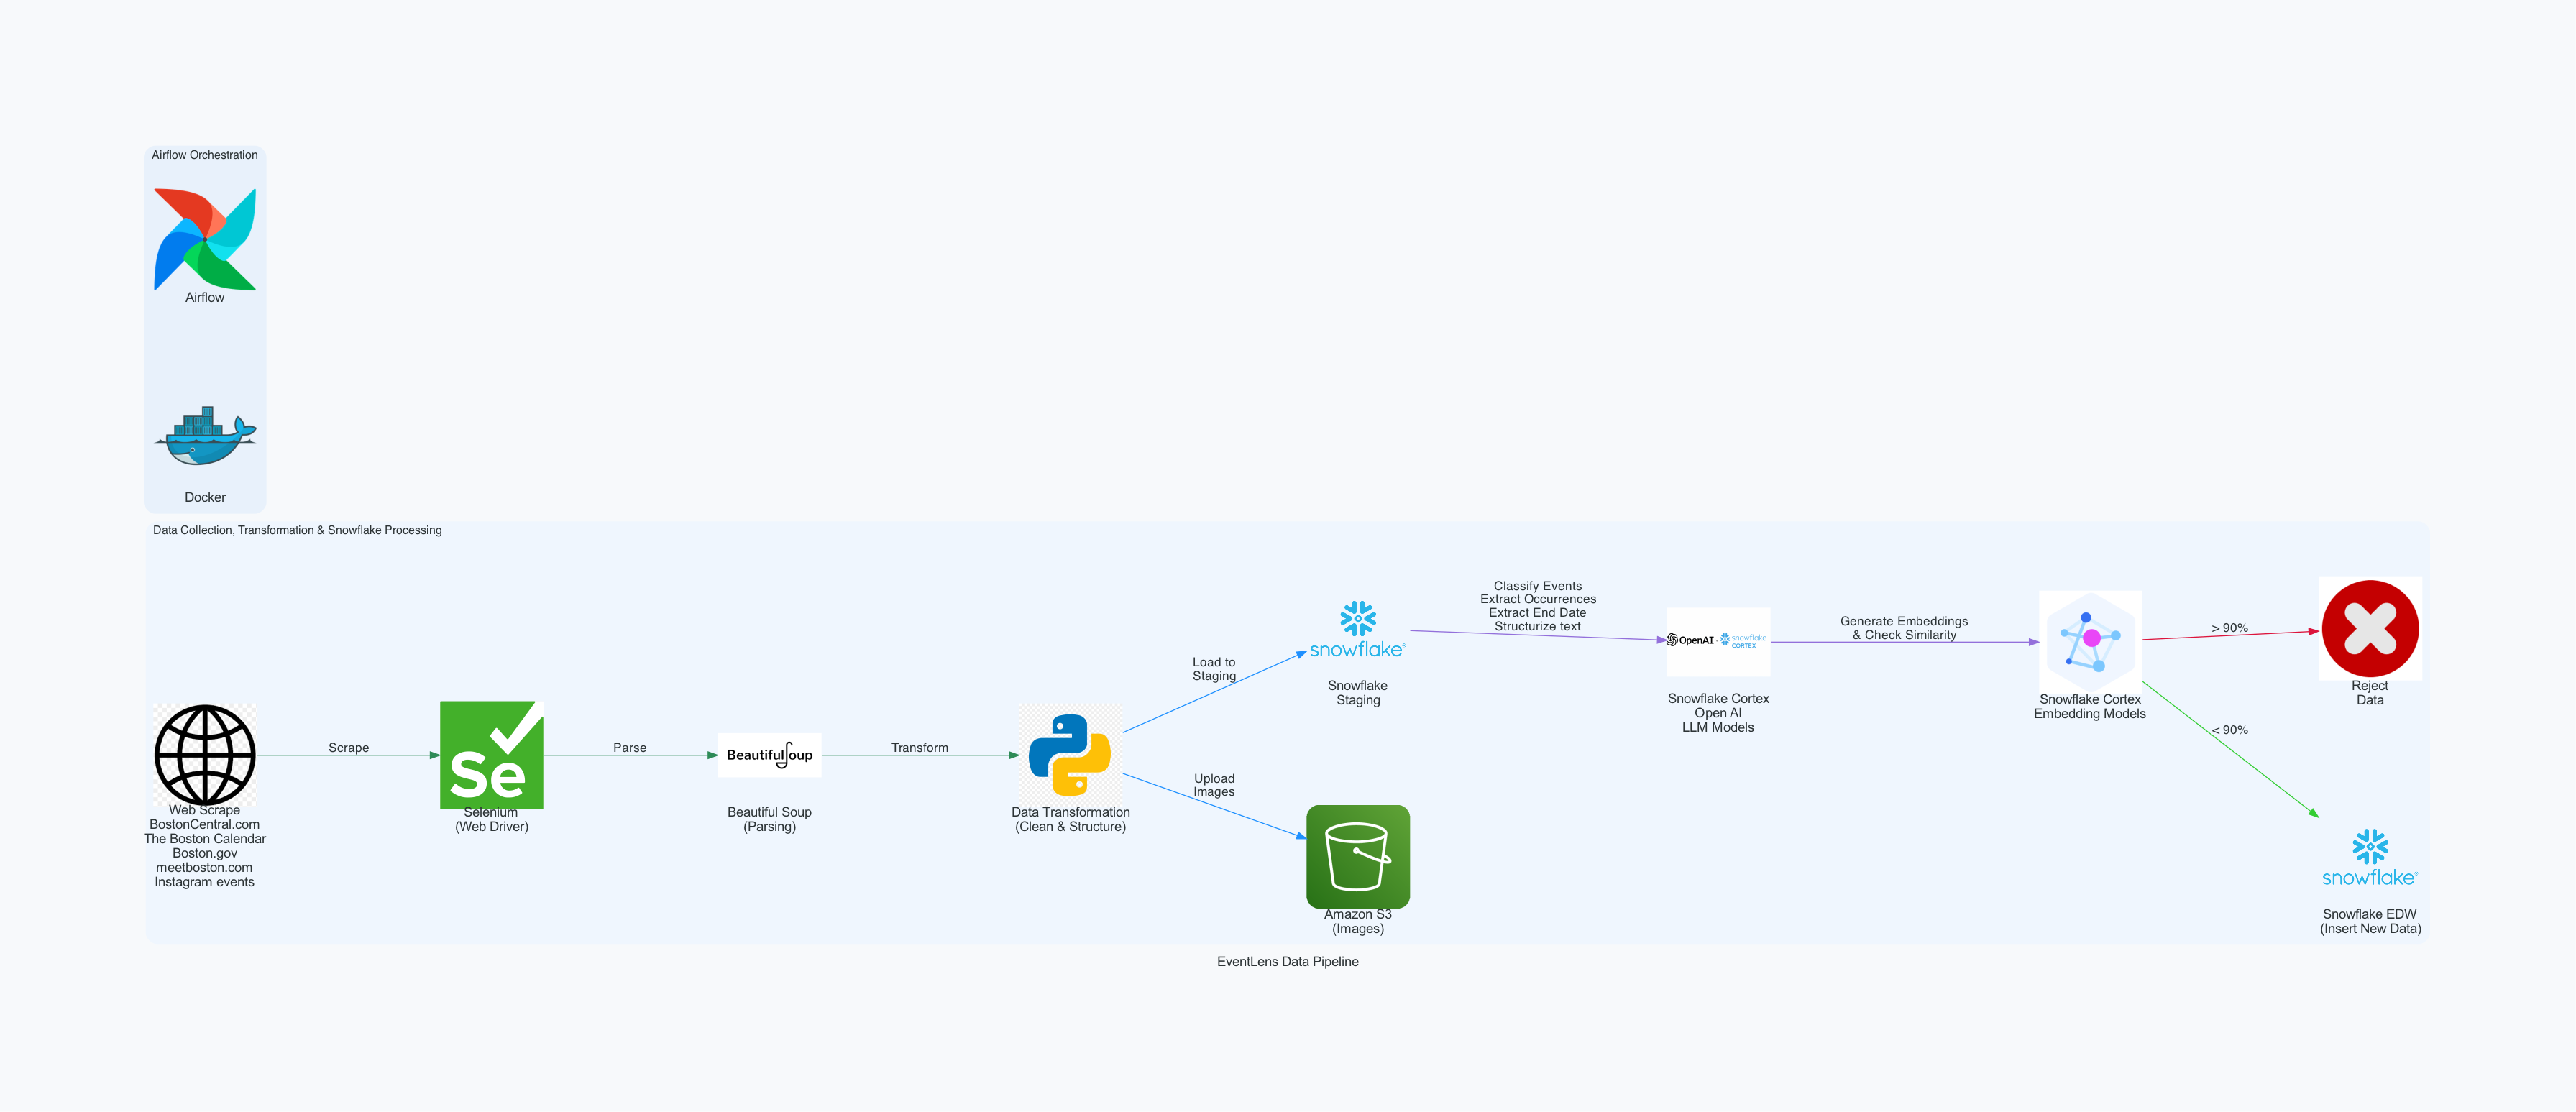

In [102]:
diag

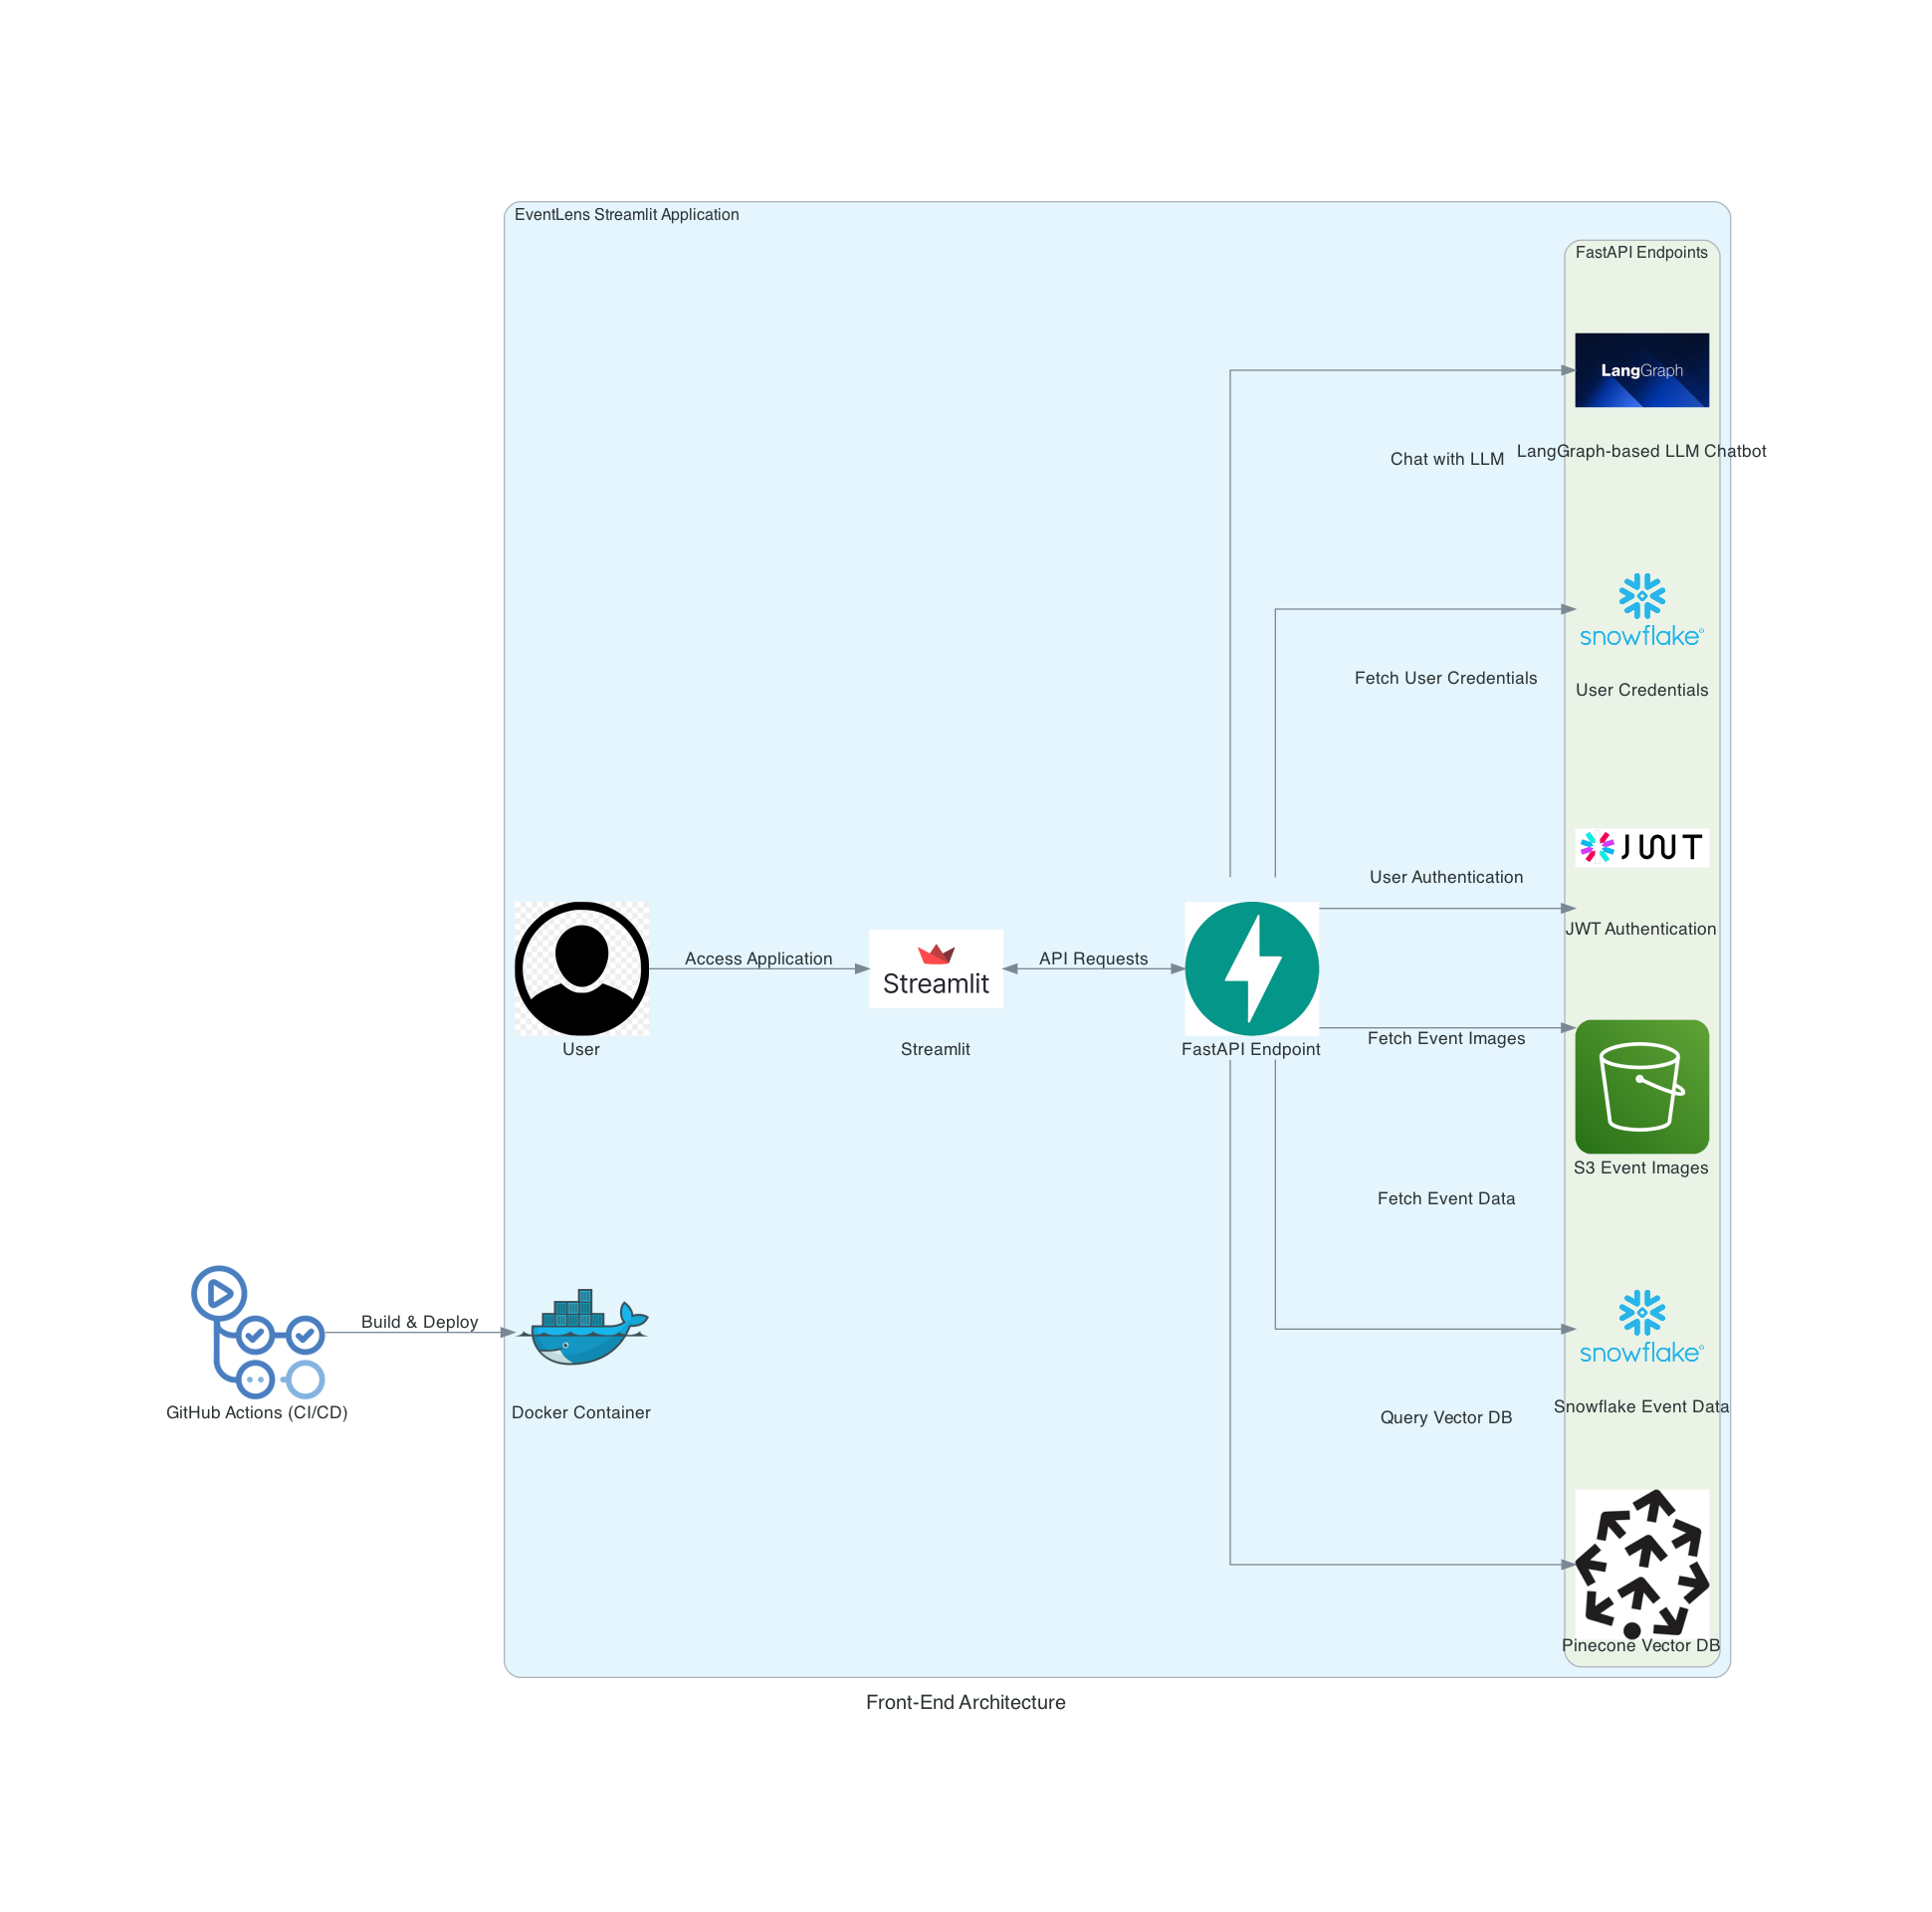

In [3]:
from diagrams import Diagram, Cluster, Edge
from diagrams.custom import Custom
from diagrams.aws.storage import S3
from diagrams.onprem.container import Docker

streamlit_icon = "input_icons/streamlit.png"
fastapi_icon = "input_icons/fastapi.png"
pinecone_icon = "input_icons/pinecone.png"
snowflake_icon = "input_icons/snowflake.png"
jwt_icon = "input_icons/jwt.png"
langgraph_icon = "input_icons/langgraph.png"
user_icon = "input_icons/user.png"
github_actions_icon = "input_icons/github_actions.png"

with Diagram("Front-End Architecture", show=False, direction="LR") as diag1:

    github_actions = Custom("GitHub Actions (CI/CD)", github_actions_icon)

   
    with Cluster("EventLens Streamlit Application"):
        docker = Docker("Docker Container")
        user = Custom("User", user_icon)
        streamlit = Custom("Streamlit", streamlit_icon)
        fastapi = Custom("FastAPI Endpoint", fastapi_icon)

        with Cluster("FastAPI Endpoints"):
            pinecone = Custom("Pinecone Vector DB", pinecone_icon)
            snowflake_event_data = Custom("Snowflake Event Data", snowflake_icon)
            s3_event_images = S3("S3 Event Images")
            jwt_auth = Custom("JWT Authentication", jwt_icon)
            snowflake_user_credentials = Custom("User Credentials", snowflake_icon)
            langgraph_chatbot = Custom("LangGraph-based LLM Chatbot", langgraph_icon)

        user >> Edge(label="Access Application") >> streamlit
        streamlit << Edge(label="API Requests", reverse=True) >> fastapi
        fastapi >> Edge(label="Query Vector DB") >> pinecone
        fastapi >> Edge(label="Fetch Event Data") >> snowflake_event_data
        fastapi >> Edge(label="Fetch Event Images") >> s3_event_images
        fastapi >> Edge(label="User Authentication") >> jwt_auth
        fastapi >> Edge(label="Fetch User Credentials") >> snowflake_user_credentials
        fastapi >> Edge(label="Chat with LLM") >> langgraph_chatbot
        
    github_actions >> Edge(label="Build & Deploy") >> docker


diag1

In [133]:
from diagrams import Diagram, Cluster, Edge
from diagrams.custom import Custom
from diagrams.aws.storage import S3
from diagrams.onprem.container import Docker

streamlit_icon = "input_icons/streamlit.png"
fastapi_icon = "input_icons/fastapi.png"
snowflake_icon = "input_icons/snowflake.png"
jwt_icon = "input_icons/jwt.png"
langgraph_icon = "input_icons/langgraph.png"
user_icon = "input_icons/user.png"
github_actions_icon = "input_icons/github_actions.png"

# Reduced spacing in graph attributes
graph_attr = {
    "fontsize": "14", 
    "fontname": "Arial",
    "bgcolor": "#F7F9FB",
    "splines": "spline",
    "nodesep": "0.6",  # Reduced from 1.2
    "ranksep": "0.8",  # Reduced from 1.2
    "compound": "true"
}

edge_attr = {
    "fontsize": "11",
    "fontname": "Arial",
    "fontcolor": "#333333",
    "penwidth": "1.0"
}

# Reduced node margins and size
node_attr = {
    "fontsize": "13",
    "fontname": "Arial",
    "margin": "0.2",  # Reduced from 0.3
    "height": "0.8",  # Reduced from 1.0
    "width": "1.2"
}

with Diagram("Front-End Architecture", show=False, direction="LR", 
             outformat="png", graph_attr=graph_attr, edge_attr=edge_attr, node_attr=node_attr) as diag1:
    
    with Cluster("EventLens Streamlit Application", graph_attr={"bgcolor": "#EFF6FE", "penwidth": "0", "margin": "10"}):
        user = Custom("User", user_icon)
        streamlit = Custom("Streamlit", streamlit_icon)
        fastapi = Custom("FastAPI Endpoint", fastapi_icon)
        
        # GitHub Actions and Docker inside the box, positioned at bottom
        with Cluster("", graph_attr={"rank": "sink", "penwidth": "0"}):
            github_actions = Custom("GitHub Actions", github_actions_icon)
            docker = Docker("Docker")
        
        # Services with tighter spacing
        snowflake_search_cortex = Custom("Snowflake Cortex\nSearch API", snowflake_icon)
        snowflake_cot_api = Custom("Snowflake COT\nRAG API", snowflake_icon)
        s3_event_images = S3("S3 Event\nImages")
        jwt_auth = Custom("JWT\nAuthentication", jwt_icon)
        snowflake_user_credentials = Custom("User\nCredentials", snowflake_icon)
        langgraph_chatbot = Custom("LangGraph\nChatbot API", langgraph_icon)
        
        user >> Edge(label="Access") >> streamlit
        streamlit << Edge(label="API Requests") >> fastapi
        
        # Concise labels with better positioning
        fastapi >> Edge(label="Event Recommendation") >> snowflake_search_cortex
        fastapi >> Edge(label="Search Events") >> snowflake_cot_api
        fastapi >> Edge(label="Fetch Images") >> s3_event_images
        fastapi >> Edge(label="Authenticate") >> jwt_auth
        fastapi >> Edge(label="Get Credentials") >> snowflake_user_credentials
        fastapi >> Edge(label="Chat with LLM") >> langgraph_chatbot
        
        # Connect GitHub Actions to Docker
        github_actions >> Edge(label="Build & Deploy") >> docker

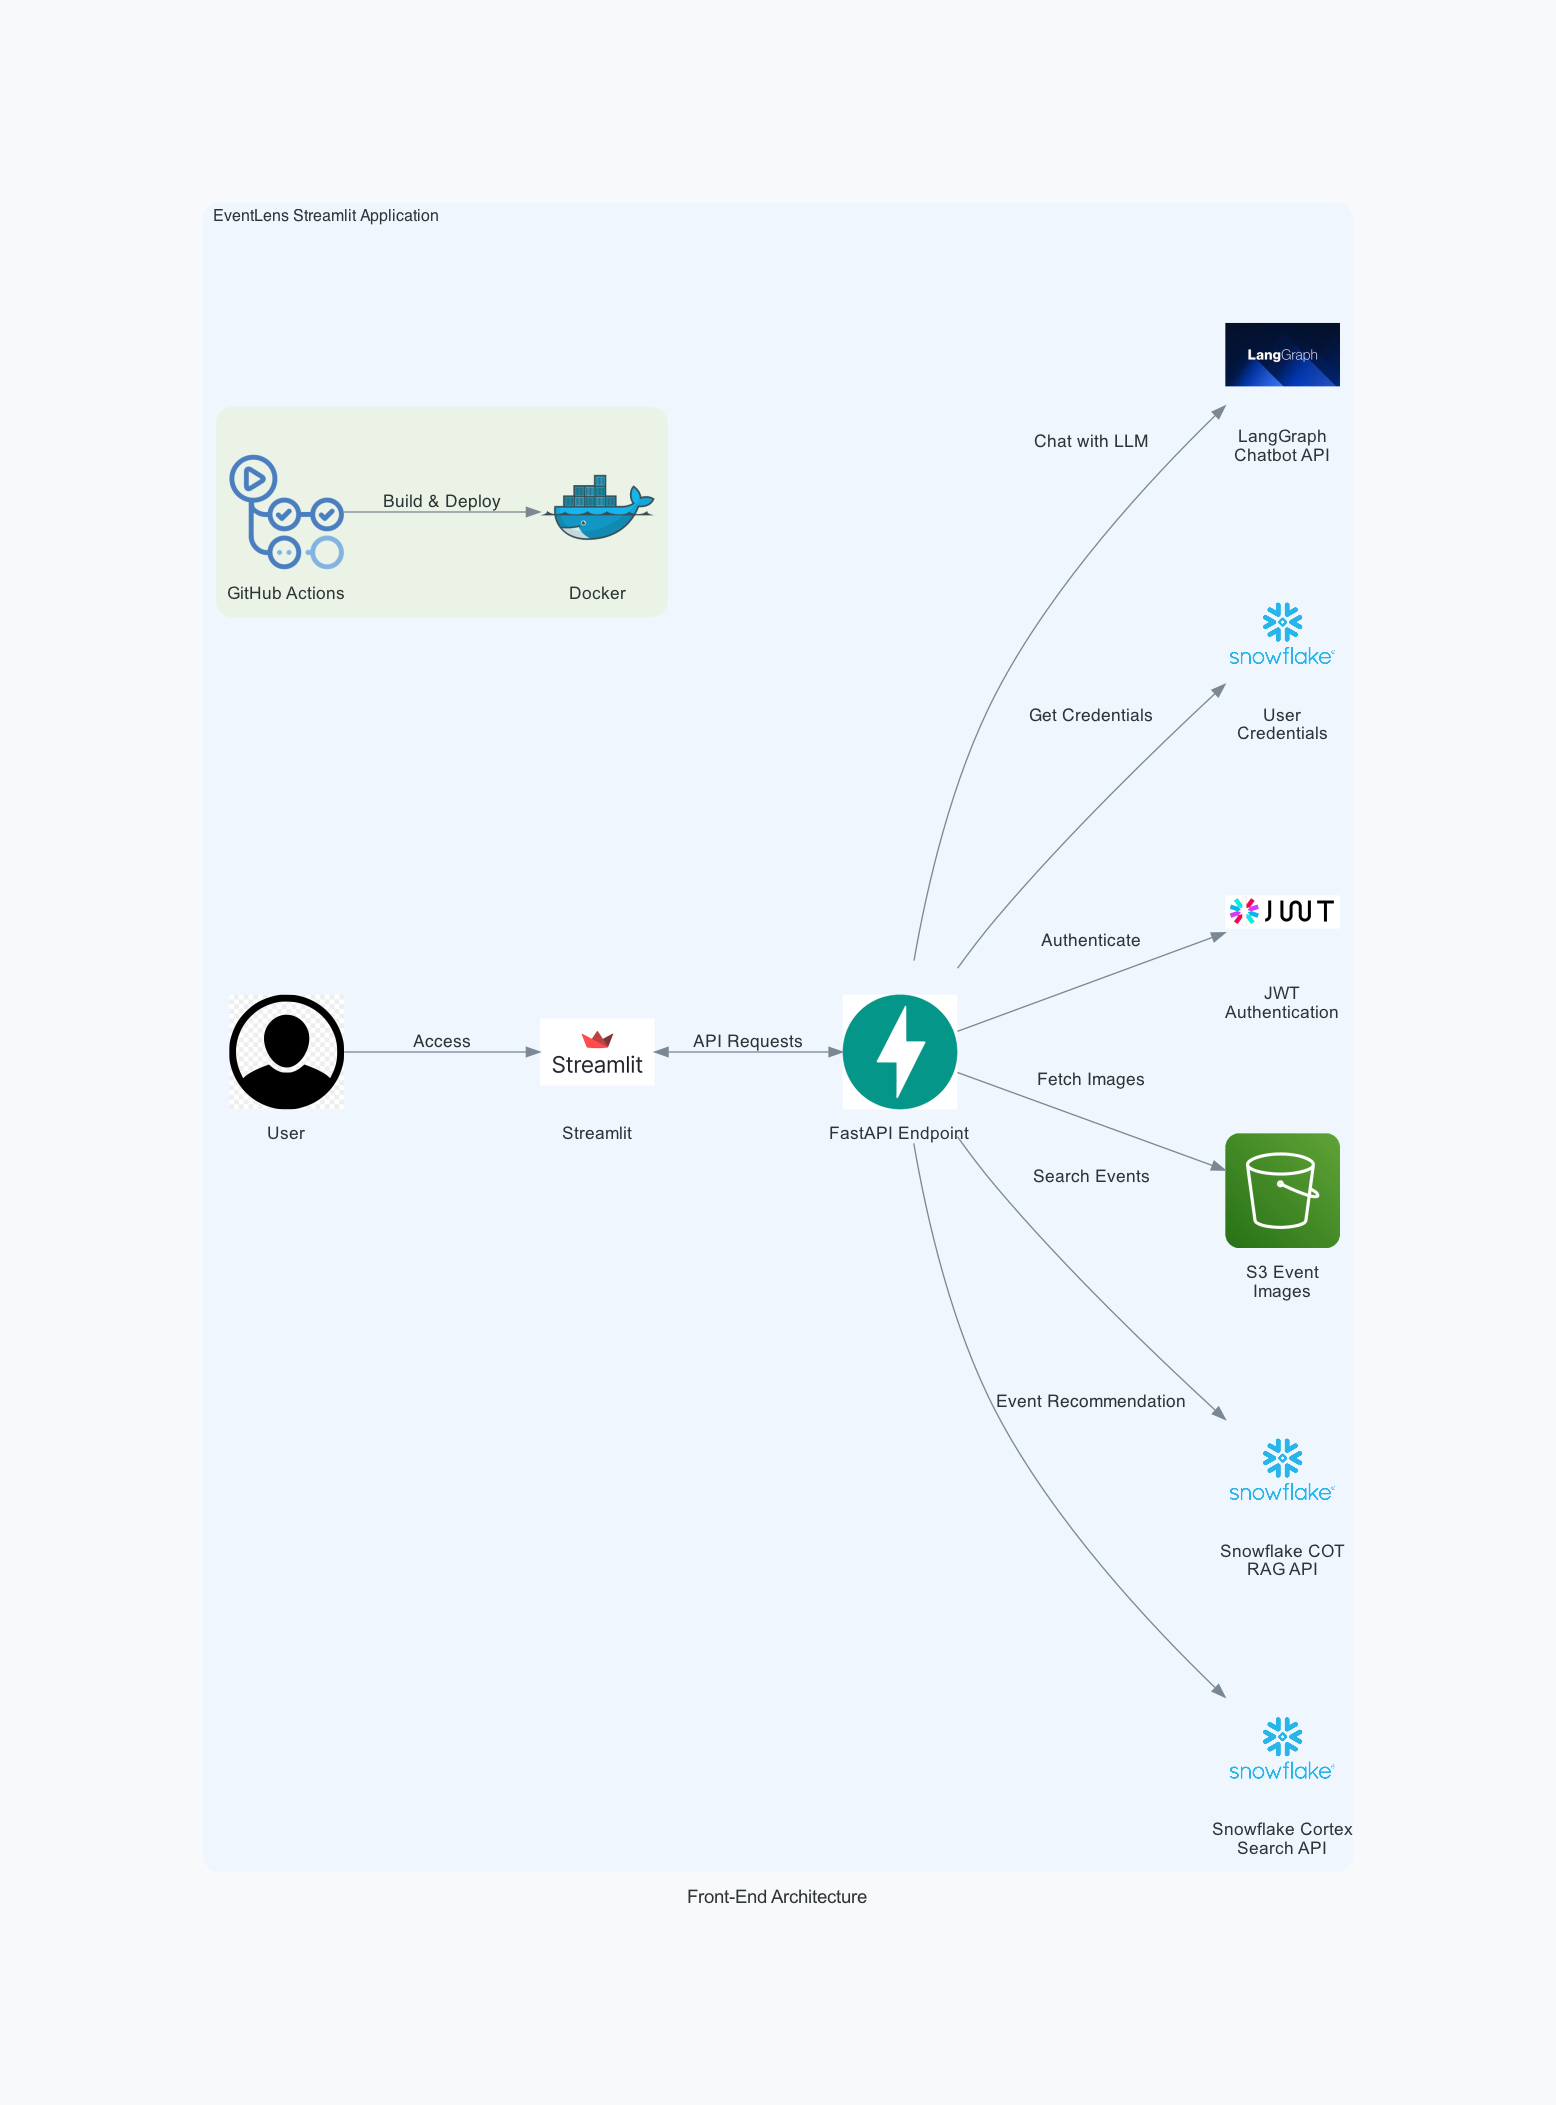

In [135]:
diag1

In [151]:
from diagrams import Diagram, Cluster, Edge
from diagrams.custom import Custom
from diagrams.programming.language import Python

# Define custom icons for the components
openai_icon = "input_icons/OpenAI.png"
weather_icon = "input_icons/openweather.png"
serp_icon = "input_icons/serpapi.png"
maps_icon = "input_icons/googlemaps.png"
langgraph_icon = "input_icons/langgraph.png"
cot_icon = "input_icons/sf_cortex_1.png"

# Set graph attributes for a compact layout
graph_attr = {
    "fontsize": "14", 
    "fontname": "Arial",
    "bgcolor": "#F7F9FB",
    "splines": "ortho",
    "nodesep": "0.5",
    "ranksep": "0.6"
}

edge_attr = {
    "fontsize": "11",
    "fontname": "Arial",
    "fontcolor": "#333333"
}

node_attr = {
    "fontsize": "13",
    "fontname": "Arial",
    "margin": "0.2",
    "height": "1.0",
    "width": "1.5"
}

with Diagram("LangGraph Chatbot Architecture", show=False, direction="TB", 
             graph_attr=graph_attr, edge_attr=edge_attr, node_attr=node_attr) as diag_2:
    
    with Cluster("LangGraph Framework", graph_attr={"bgcolor": "#E6F2FF", "penwidth": "0"}):
        # Define the main LangGraph components
        langgraph = Custom("LangGraph Controller", langgraph_icon)
        relevance_check = Custom("Relevance Check\n(OpenAI)", openai_icon)
        controller = Custom("Controller Node\n(OpenAI)", openai_icon)
        final_answer = Custom("Final Answer Node\n(OpenAI)", openai_icon)
        
        # Define API nodes
        with Cluster("External APIs", graph_attr={"bgcolor": "#F0F8FF", "penwidth": "0"}):
            weather_api = Custom("Weather API\n(OpenWeather)", weather_icon)
            serp_api = Custom("SERP API\n(Sentiment Analysis)", serp_icon)
            maps_api = Custom("Maps API\n(Google Maps)", maps_icon)
            rag_cot_api = Custom("RAG-based COT API\n(Snowflake)", cot_icon)
        
        # Connect the components without the user
        langgraph >> Edge(label="Check Query\nRelevance") >> relevance_check
        relevance_check >> Edge(label="Pass Relevant\nQuery") >> controller
        
        # Controller routes to different APIs
        controller >> Edge(label="Route: Weather") >> weather_api
        controller >> Edge(label="Route: Sentiment") >> serp_api
        controller >> Edge(label="Route: Location") >> maps_api
        controller >> Edge(label="Route: Complex\nQuestion") >> rag_cot_api
        
        # API results back to final answer
        weather_api >> Edge() >> final_answer
        serp_api >> Edge() >> final_answer
        maps_api >> Edge() >> final_answer
        rag_cot_api >> Edge() >> final_answer

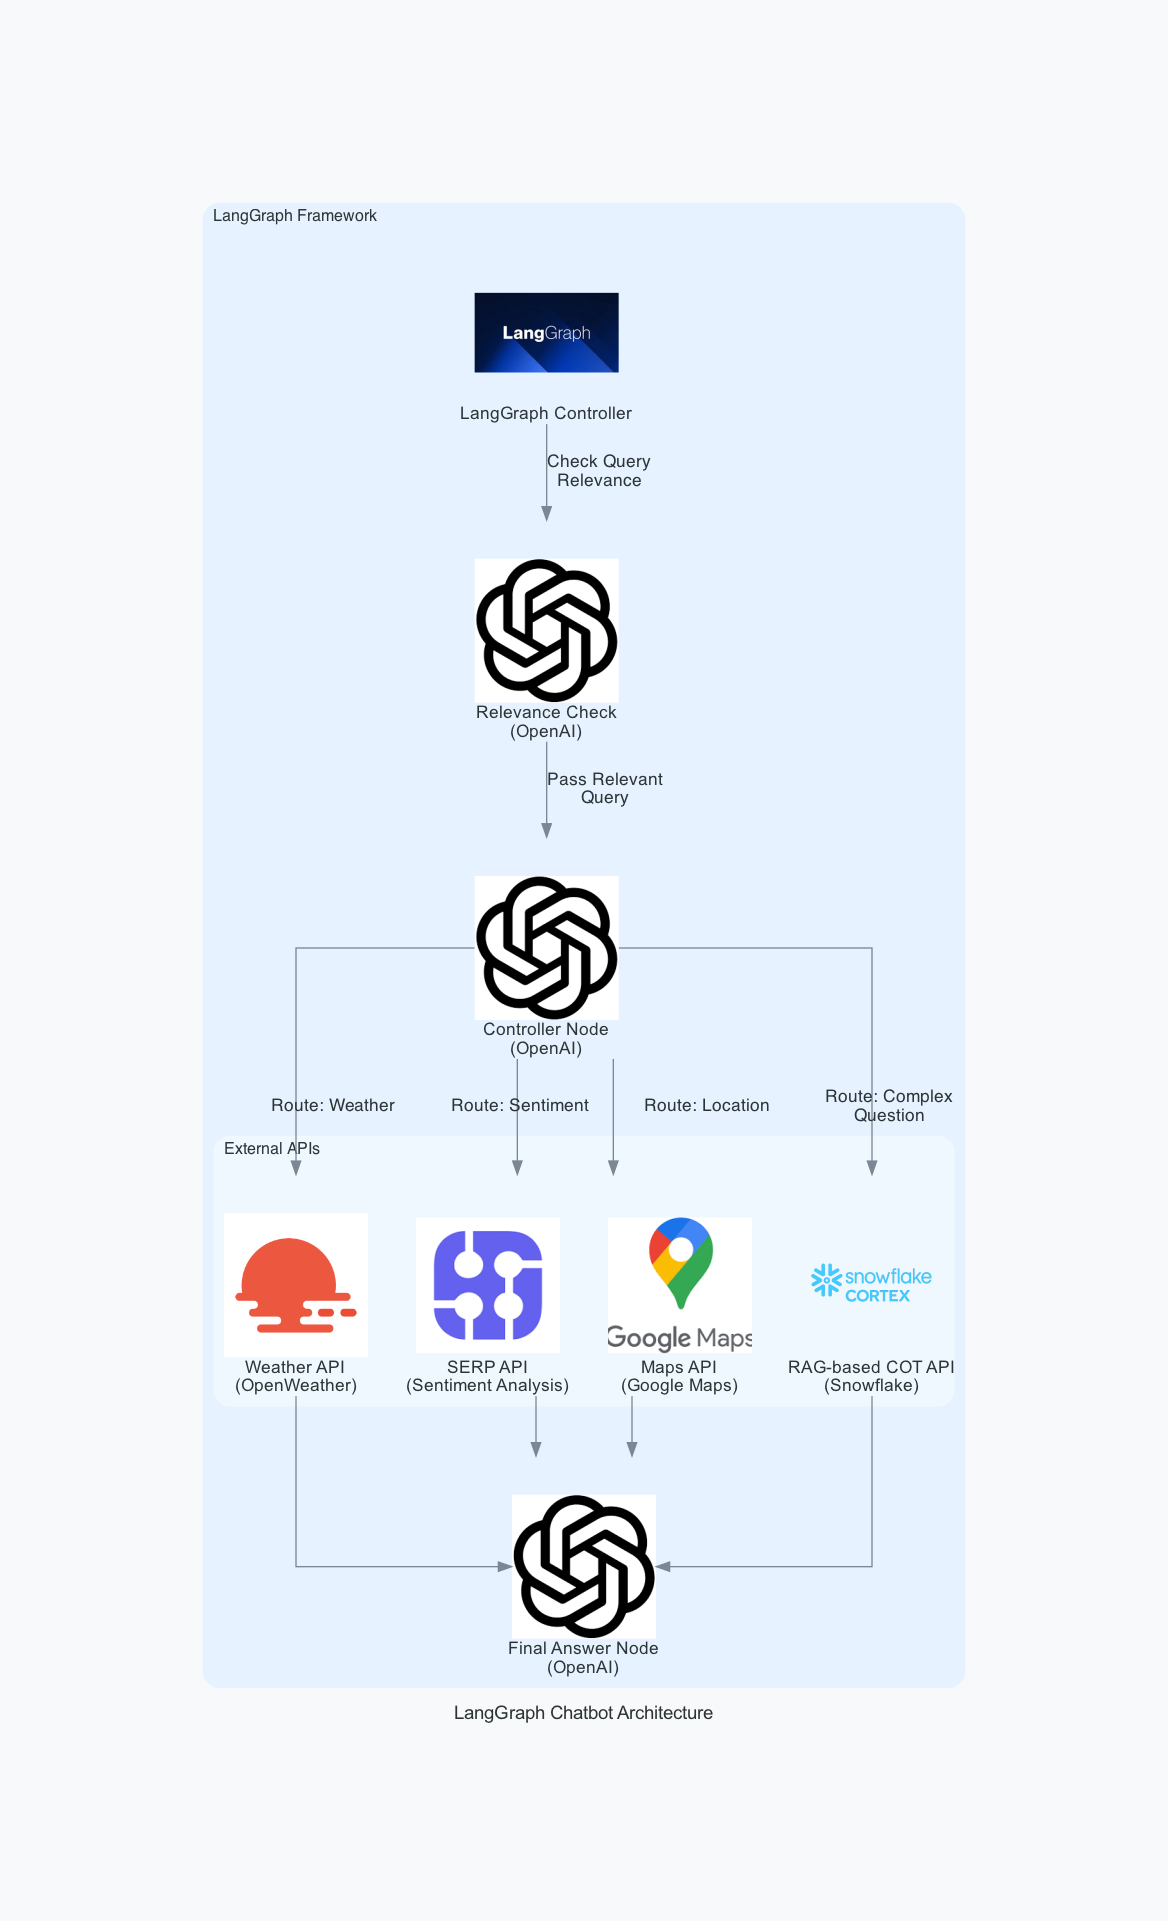

In [153]:
diag_2